# importing

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# loading data set


In [23]:
car_acc= pd.read_csv(r'C:\mini_project\data\merged-csv-files.csv')
car_acc.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
0,Alabama,18.8,39,30,80,64914
1,Alaska,18.1,41,25,94,4593
2,Arizona,18.6,35,28,96,59575
3,Arkansas,22.4,18,26,95,32953
4,California,12.0,35,28,89,320784


In [24]:
print(car_acc.describe(include=["O"]))

          state
count        51
unique       51
top     Alabama
freq          1


In [25]:
print(car_acc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   drvr_fatl_col_bmiles    51 non-null     float64
 2   perc_fatl_speed         51 non-null     int64  
 3   perc_fatl_alcohol       51 non-null     int64  
 4   perc_fatl_1st_time      51 non-null     int64  
 5   million_miles_annually  51 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB
None


# Pre Processing

In [26]:
check_nan = car_acc['perc_fatl_speed'].isnull().values.any()
# printing the result
print(check_nan)



False


In [27]:
car_acc.shape

(51, 6)

In [28]:
car_acc.dtypes

state                      object
drvr_fatl_col_bmiles      float64
perc_fatl_speed             int64
perc_fatl_alcohol           int64
perc_fatl_1st_time          int64
million_miles_annually      int64
dtype: object

In [29]:
# Data type conversions
car_acc['state'] = car_acc['state'].astype('string')

# Show new data types
car_acc.dtypes

state                      string
drvr_fatl_col_bmiles      float64
perc_fatl_speed             int64
perc_fatl_alcohol           int64
perc_fatl_1st_time          int64
million_miles_annually      int64
dtype: object

# Visualization

       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  million_miles_annually    cluster      cen_x  \
count            51.00000               51.000000  51.000000  51.000000   
mean             88.72549            57851.019608   1.078431  31.725490   
std               6.96011            59898.414088   0.890913   8.509051   
min              76.00000             3568.000000   0.000000  20.555556   
25%              83.5

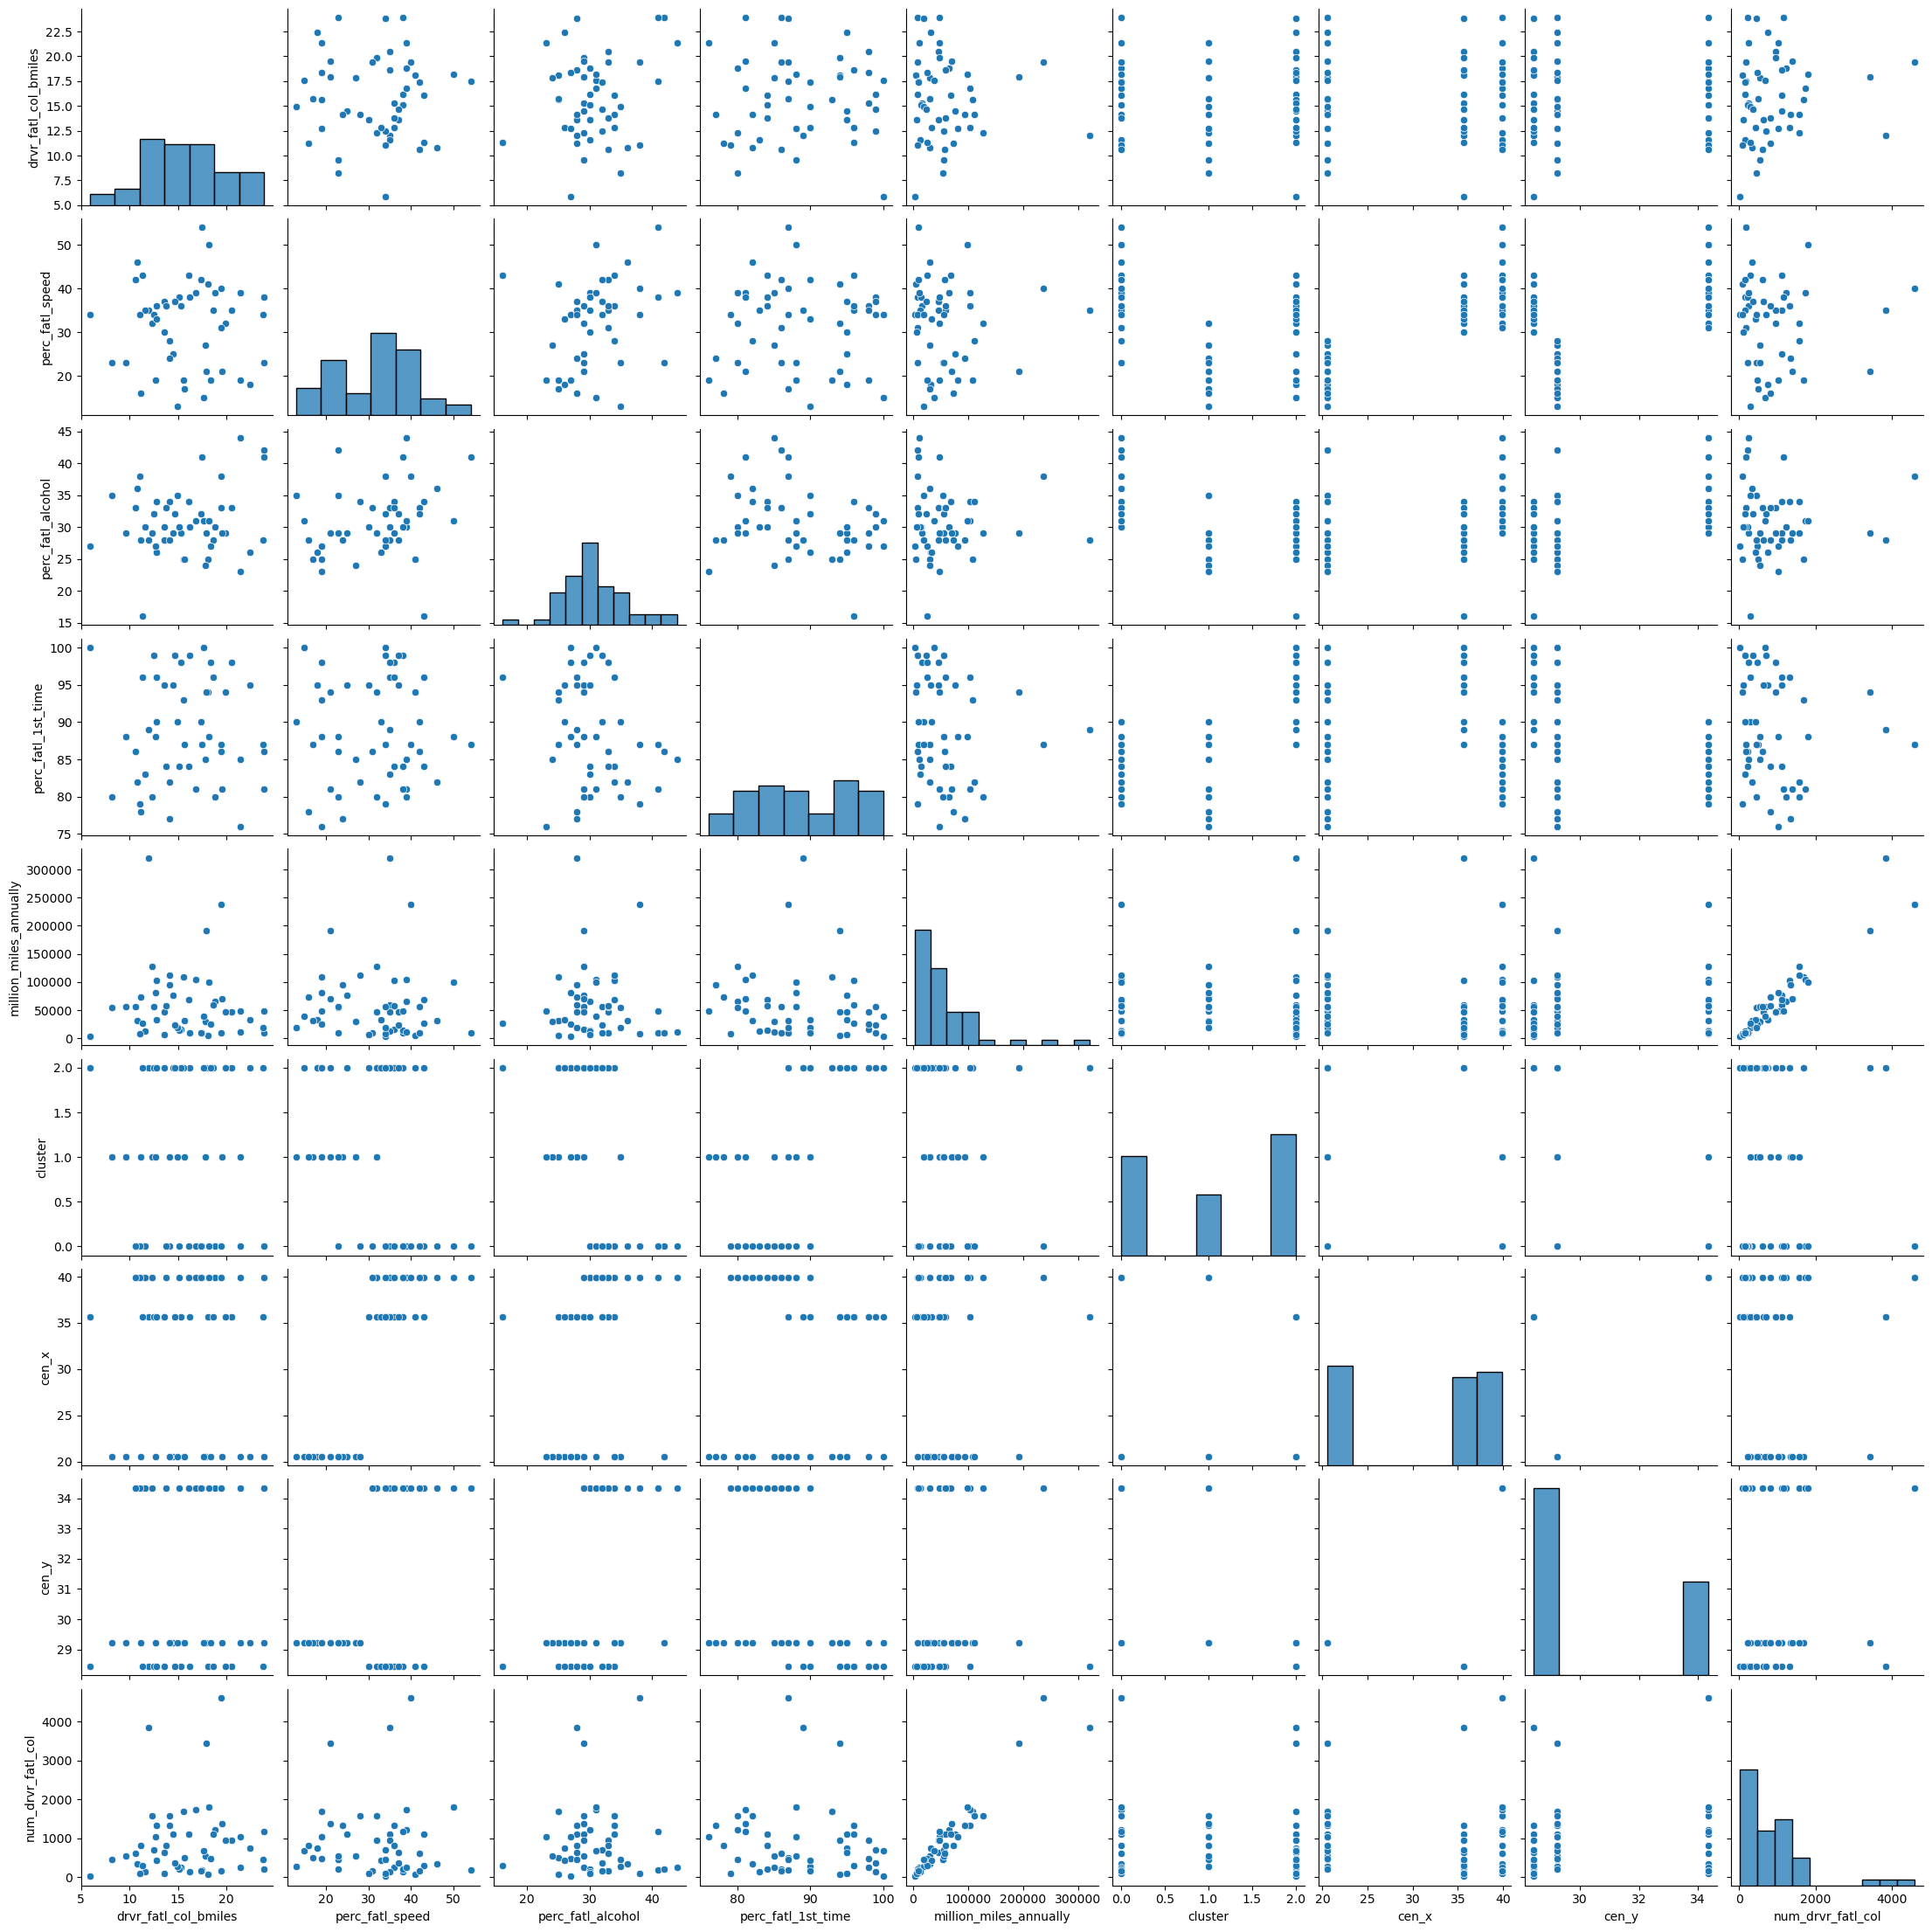

In [73]:
# import seaborn and make plots appear inline
import seaborn as sns
%matplotlib inline

# Compute the summary statistics of all columns in the `car_acc` DataFrame
sum_stat_car = car_acc.describe()
print(sum_stat_car)

# Create a pairwise scatter plot to explore the data
sns.pairplot(car_acc)

array([[<AxesSubplot: title={'center': 'drvr_fatl_col_bmiles'}>,
        <AxesSubplot: title={'center': 'perc_fatl_speed'}>],
       [<AxesSubplot: title={'center': 'perc_fatl_alcohol'}>,
        <AxesSubplot: title={'center': 'perc_fatl_1st_time'}>],
       [<AxesSubplot: title={'center': 'million_miles_annually'}>,
        <AxesSubplot: >]], dtype=object)

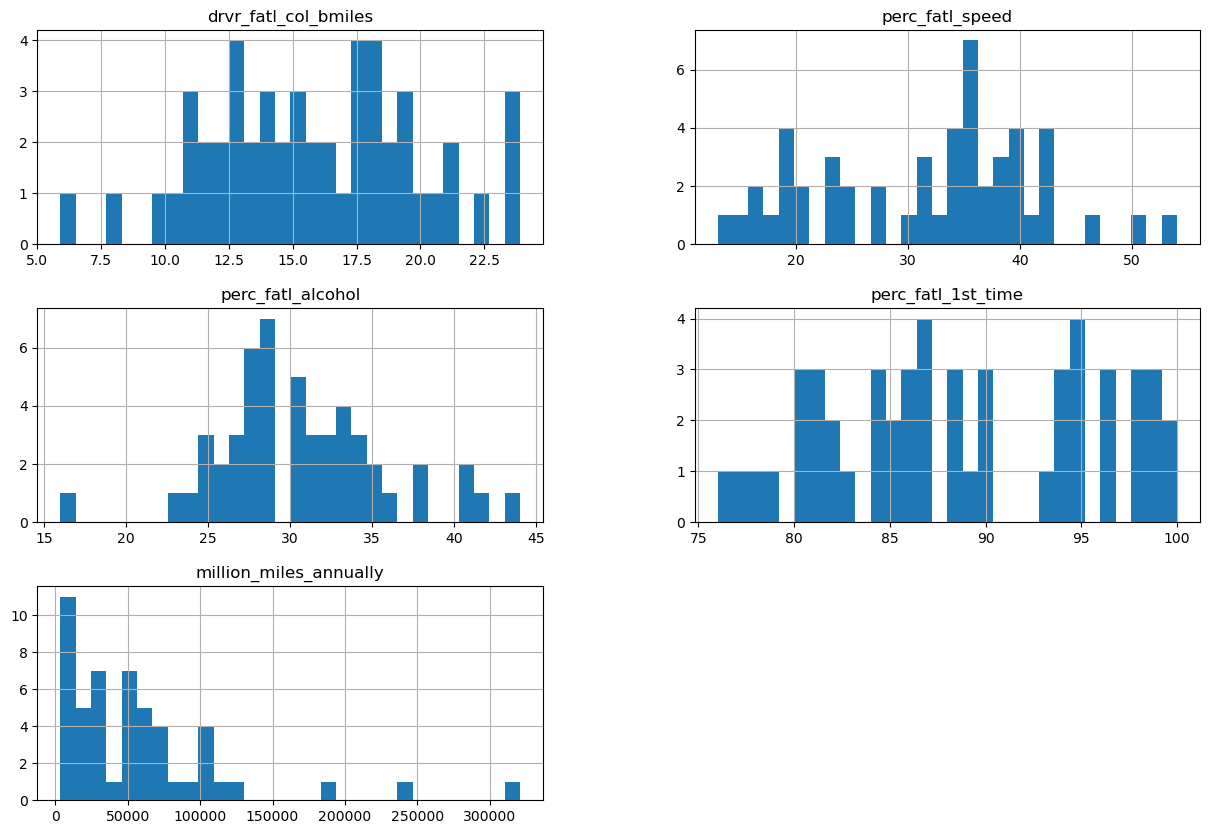

In [31]:
car_acc.hist(bins=30, figsize=(15, 10))


In [32]:
import plotly.express as px
fig = px.scatter_matrix(car_acc,
    dimensions=["drvr_fatl_col_bmiles", "perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"],
    color="state")
fig.update_layout(
    title='Road_Accident_Mortality',
    dragmode='select',
    width=800,
    height=800,
    hovermode='closest',
)
fig.show()


c:\Users\popo\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



# Pearson correlation coefficient

In [33]:

pearsoncorr = car_acc.corr(method='pearson')
pearsoncorr

C:\Users\popo\AppData\Local\Temp\ipykernel_16800\2255855268.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942,-0.077133
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066,-0.043199
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455,-0.034561
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000,-0.128928
million_miles_annually,-0.077133,-0.043199,-0.034561,-0.128928,1.000000


<AxesSubplot: >

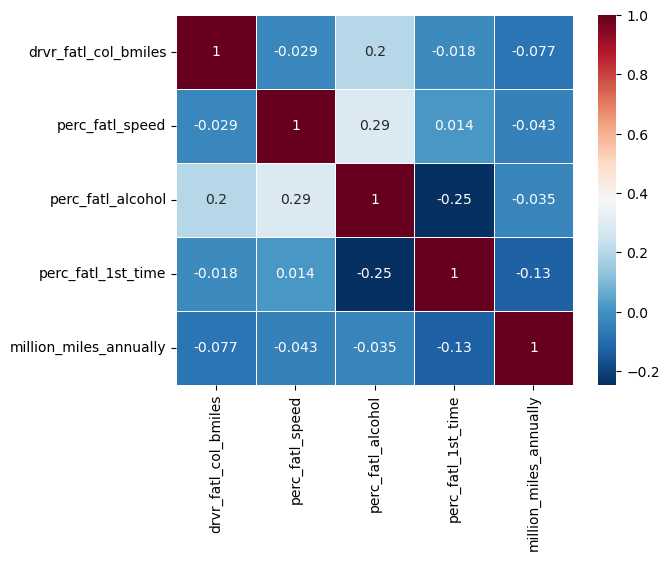

In [34]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

# Multi_Varient_Regression

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
np.random.seed(19680801)

In [36]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [37]:
car_acc.isnull().values.any()

False

In [38]:

features = car_acc[["perc_fatl_speed","perc_fatl_alcohol","perc_fatl_1st_time"]]
target = car_acc['drvr_fatl_col_bmiles']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(features, target)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(features) # adding a constant
 
model = sm.OLS(target, features).fit()
predictions = model.predict(features) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 9.064980483403303
Coefficients: 
 [-0.04180041  0.19086404  0.02473301]
                                  OLS Regression Results                                 
Dep. Variable:     drvr_fatl_col_bmiles   R-squared (uncentered):                   0.939
Model:                              OLS   Adj. R-squared (uncentered):              0.935
Method:                   Least Squares   F-statistic:                              247.5
Date:                  Wed, 22 Feb 2023   Prob (F-statistic):                    3.45e-29
Time:                          19:54:13   Log-Likelihood:                         -143.31
No. Observations:                    51   AIC:                                      292.6
Df Residuals:                        48   BIC:                                      298.4
Df Model:                             3                                                  
Covariance Type:              nonrobust                                                  
               

# PCA on standardized data

In [39]:
from sklearn.preprocessing import StandardScaler
features_scaled = StandardScaler().fit_transform(features)


The cumulative variance of the first two principal components is 0.7947


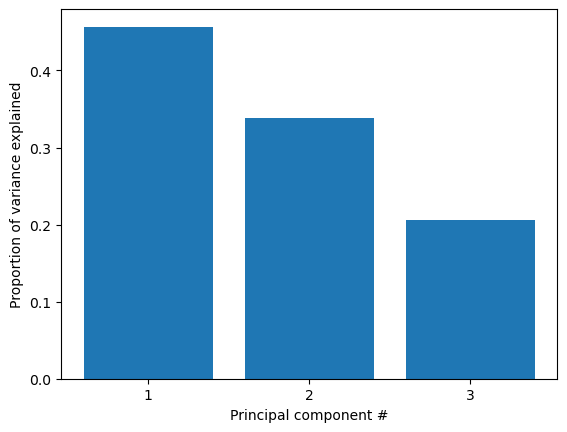

In [40]:
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

# Visualize the first two principal components

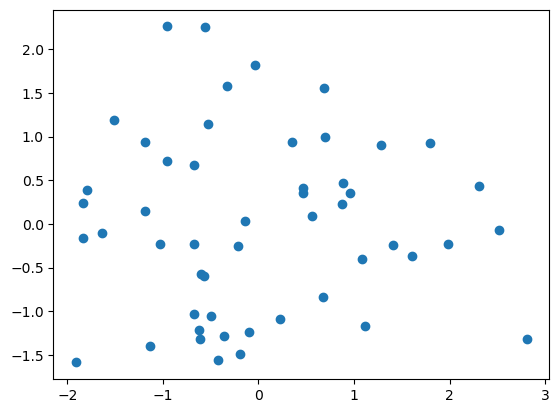

In [41]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1,p_comp2)

c:\Users\popo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\popo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

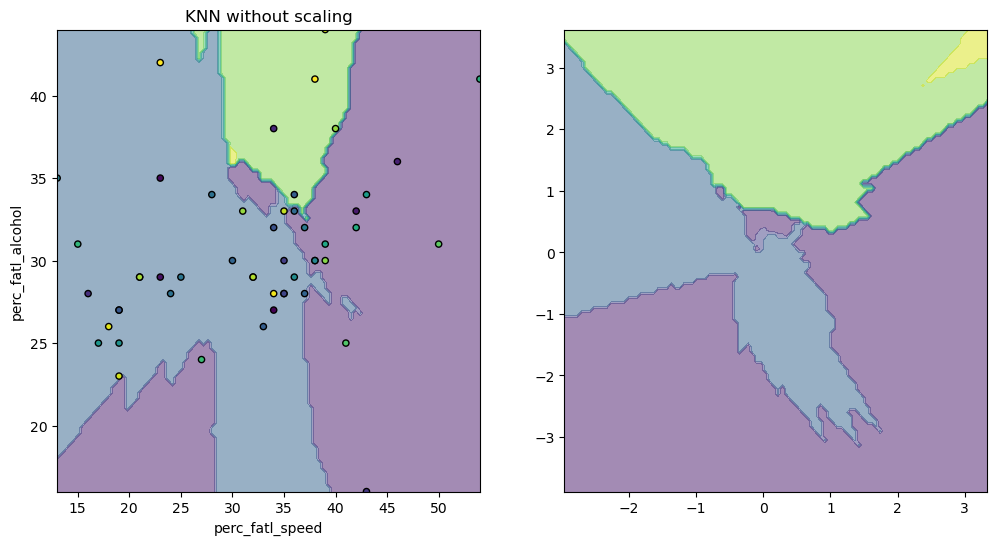

In [53]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils

clf = KNeighborsClassifier(n_neighbors=20)
X_plot = car_acc[["perc_fatl_speed", "perc_fatl_alcohol"]]
X_plot_scaled = StandardScaler().fit_transform(X_plot)

def fit_and_plot_model(X_plot, target, clf, ax):
    clf.fit(X_plot, target)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["perc_fatl_speed"], X_plot["perc_fatl_alcohol"], c=target, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["perc_fatl_speed"].min(), X_plot["perc_fatl_speed"].max()))
    disp.ax_.set_ylim((X_plot["perc_fatl_alcohol"].min(), X_plot["perc_fatl_alcohol"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(target)
fit_and_plot_model(X_plot,y_transformed, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled , y_transformed, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")



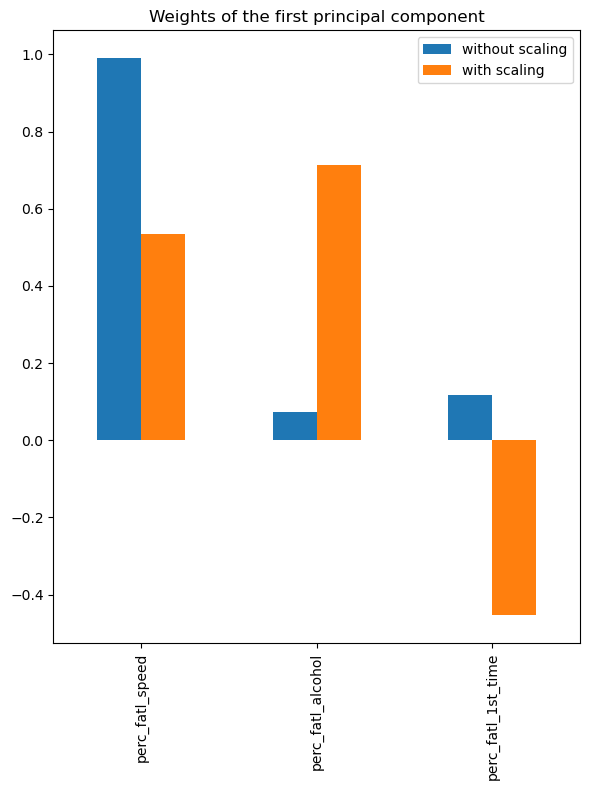

In [51]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
# x=car_acc[["perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"]]
X_train, X_test, y_train, y_test = train_test_split(
   features, target, test_size=0.30, random_state=42
)



import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(features_scaled)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(features_scaled)

first_pca_component = pd.DataFrame(
    pca.components_[0], index= X_train.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)

_ = plt.tight_layout()

# clusters of similar states in the data

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

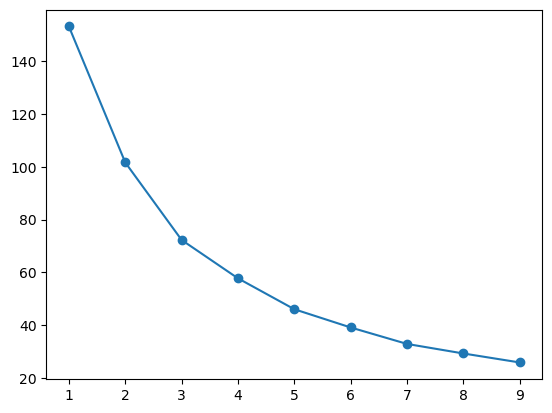

In [42]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

# Visualize the first two principal components

# Kmeans

In [ ]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 

pca = PCA(2)
 
car_acc.shape

(51, 6)

In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(car_acc[["perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"]])
 
print(label)

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



[4 3 3 7 0 3 2 3 3 7 7 2 3 3 7 1 0 5 3 4 3 8 5 1 7 2 6 1 3 4 5 7 4 4 8 8 3
 0 2 6 6 4 5 2 9 3 1 2 0 4 2]


In [54]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(car_acc[["perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"]])



c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



# Clustering 

In [55]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
car_acc['cluster'] = kmeans.fit_predict(car_acc[["perc_fatl_speed", "perc_fatl_alcohol", "perc_fatl_1st_time"]])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
car_acc['cen_x'] = car_acc.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
car_acc['cen_y'] = car_acc.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
car_acc['c'] = car_acc.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

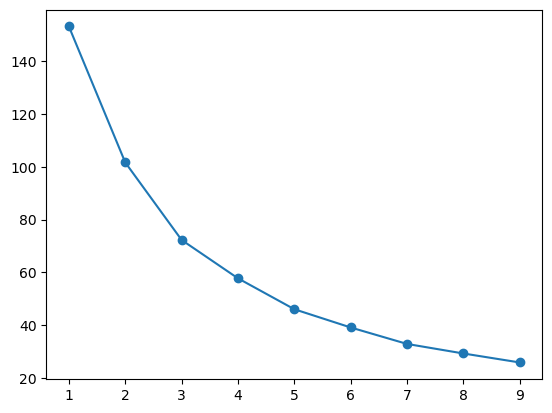

In [56]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

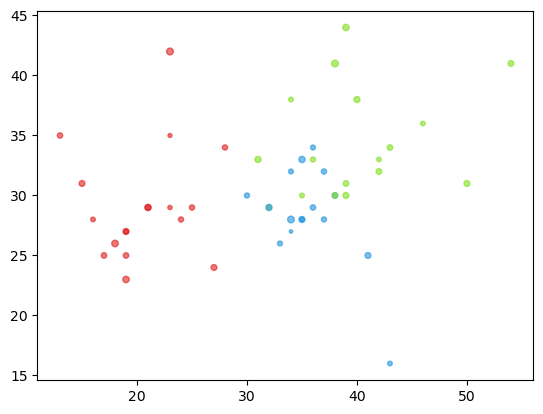

In [57]:
plt.scatter(car_acc.perc_fatl_speed, car_acc.perc_fatl_alcohol, c=car_acc.c, s=car_acc.drvr_fatl_col_bmiles, alpha = 0.6)

c:\Users\popo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



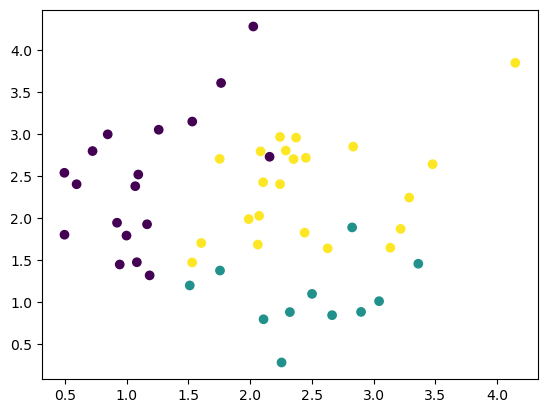

In [58]:
km = KMeans(n_clusters=3, random_state=8)

# Fit the data to the `km` object
p_comps = km.fit_transform(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:,0], p_comps[:,1], c=km.labels_)

Text(0, 0.5, 'perc_fatl_alcohol')

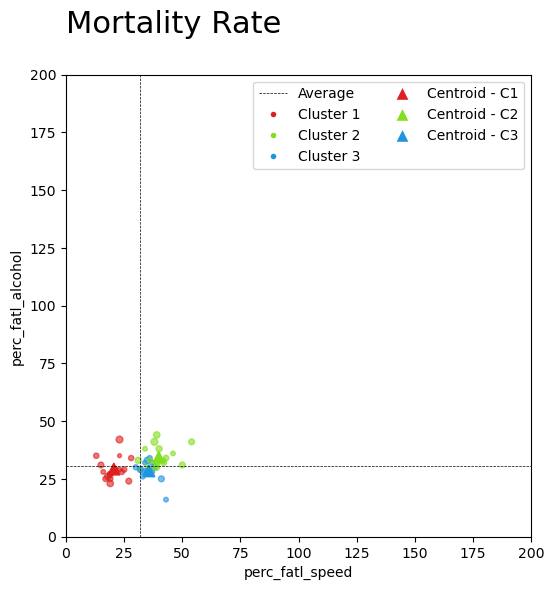

In [59]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize=(6,6))
# plot data

plt.scatter(car_acc.perc_fatl_speed, car_acc.perc_fatl_alcohol, c=car_acc.c, alpha = 0.6, s=car_acc.drvr_fatl_col_bmiles)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot Attack mean
plt.plot([car_acc.perc_fatl_speed.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
plt.xlim(0,200)
# plot Defense mean
plt.plot([0,200], [car_acc.perc_fatl_alcohol.mean()]*2, color='black', lw=0.5, linestyle='--')
plt.ylim(0,200)
# create a list of legend elemntes
## average line
legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]
## markers / records
cluster_leg = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# add all elements to the same list
legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
# plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# title and labels
plt.title('Mortality Rate \n', loc='left', fontsize=22)
plt.xlabel('perc_fatl_speed')
plt.ylabel('perc_fatl_alcohol')

(0.0, 80.0)

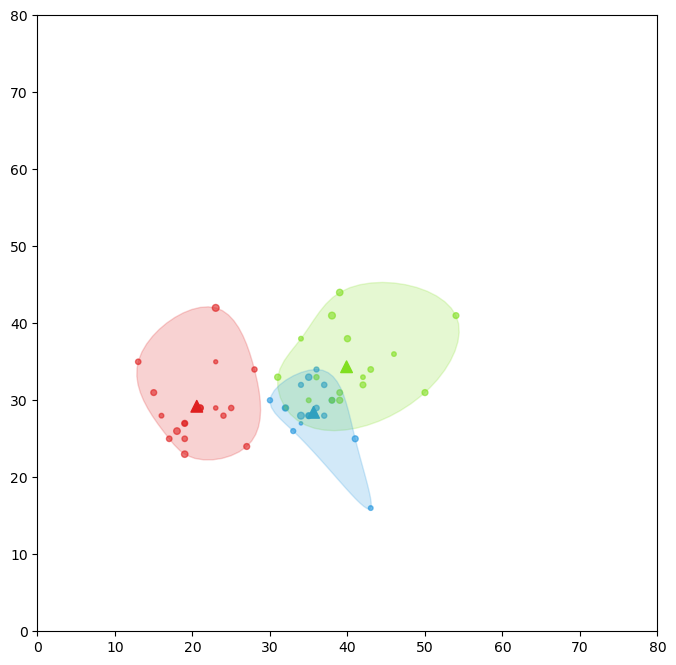

In [62]:
from scipy import interpolate
from scipy.spatial import ConvexHull, convex_hull_plot_2d
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(car_acc.perc_fatl_speed,car_acc.perc_fatl_alcohol, c=car_acc.c, alpha = 0.6, s=car_acc.drvr_fatl_col_bmiles)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in car_acc.cluster.unique():
    # get the convex hull
    points =car_acc[car_acc.cluster == i][['perc_fatl_speed', 'perc_fatl_alcohol']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0, per=1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
    
plt.xlim(0,80)
plt.ylim(0,80)

(0.0, 80.0)

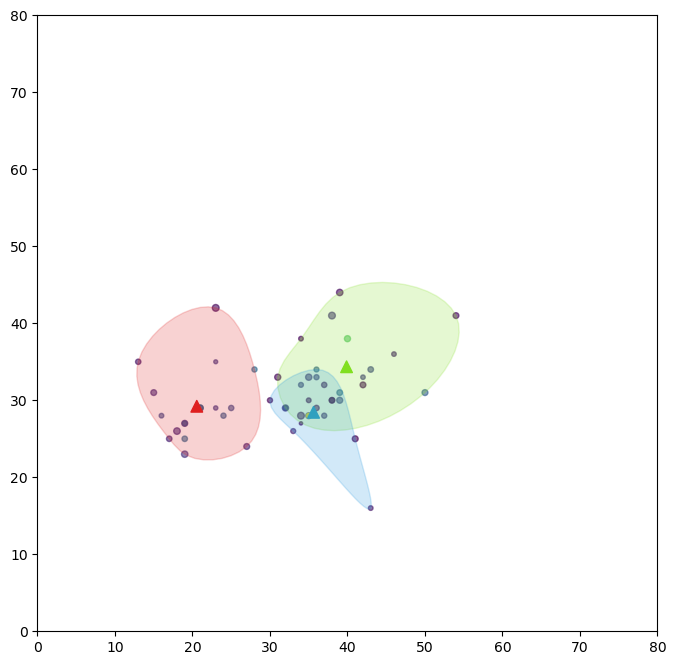

In [63]:
import seaborn as sns
from scipy import interpolate
fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(car_acc.perc_fatl_speed, car_acc.perc_fatl_alcohol, c=car_acc.million_miles_annually, alpha = 0.6, s=car_acc.drvr_fatl_col_bmiles)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in car_acc.cluster.unique():
    # get the convex hull
    points =car_acc[car_acc.cluster == i][['perc_fatl_speed', 'perc_fatl_alcohol']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    

    
    

    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0, per=1)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
  
plt.xlim(0,80)
plt.ylim(0,80)

# Violin plotting

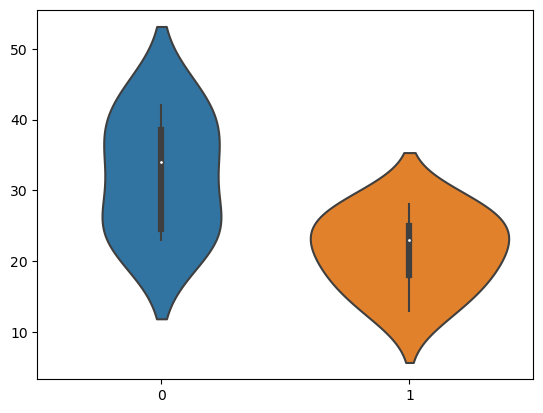

In [64]:
import seaborn as sns
    
    
sns.violinplot([y_hull ,  x_hull])

plt.show()



# Visualize the feature differences between the clusters

<AxesSubplot: xlabel='percent', ylabel='measurement'>

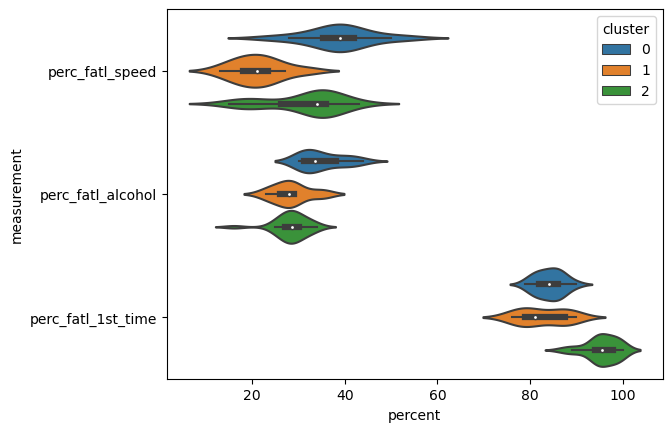

In [65]:
# Create a new column with the labels from the KMeans clustering
car_acc['cluster'] =  km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(car_acc, id_vars="cluster", var_name="measurement", value_name="percent", value_vars=features)

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(x=melt_car["percent"], y=melt_car["measurement"], hue=melt_car["cluster"])

# Compute the number of accidents within each cluster

C:\Users\popo\AppData\Local\Temp\ipykernel_16800\2592000802.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


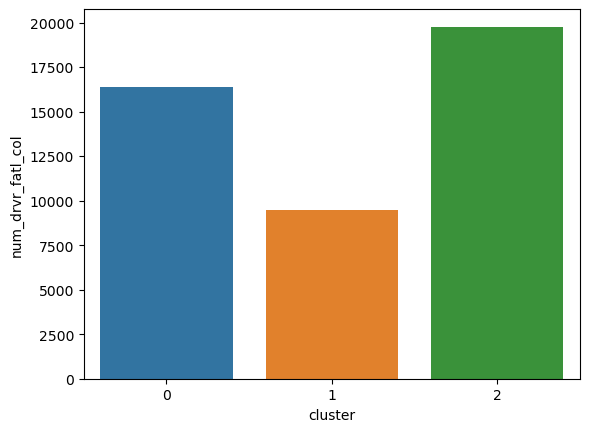

In [69]:

car_acc['num_drvr_fatl_col'] = car_acc['drvr_fatl_col_bmiles']*car_acc["million_miles_annually"]/1000

# Create a barplot of the total number of accidents per cluster
sns.barplot(x=car_acc["cluster"], y=car_acc["num_drvr_fatl_col"], data=car_acc, estimator=sum, ci=None)

# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc.groupby("cluster")["num_drvr_fatl_col"].agg(["count", "mean", "sum"])
count_mean_sum

# Make a decision when there is no clear right choice

In [70]:
# Which cluster would you choose?
cluster_num = 2